# Drug Dataset Classification Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get Data

In [2]:
df = pd.read_csv('files/drug200.csv')
df.info() # 200 patients, 5 features and a target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
df.head() # 4 categorical columns, 2 continuous

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.drop(['Age','Na_to_K'],axis=1).describe() # no missing data

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


## EDA

### Age distribution 

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

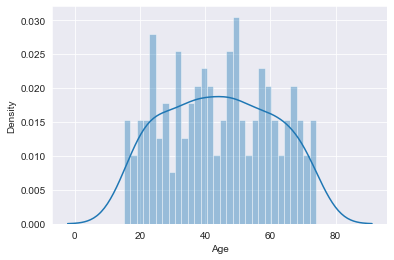

In [11]:
sns.distplot(df['Age'],bins=30) # patients between 15 and 74

### Sex

<AxesSubplot:xlabel='Sex', ylabel='Count'>

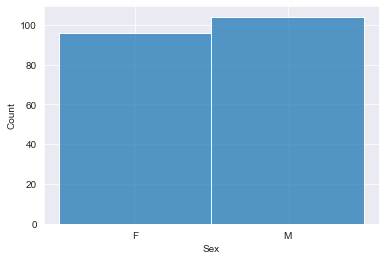

In [15]:
sns.histplot(df,x='Sex') # slightly more M than F

### Blood Pressure 

<AxesSubplot:xlabel='BP', ylabel='Count'>

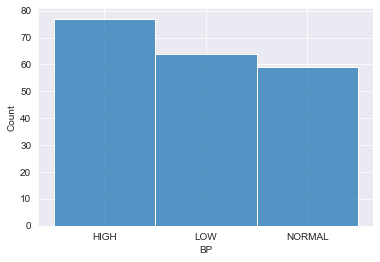

In [13]:
sns.histplot(df,x='BP') # slight differences, high > low > normal bp

### Cholesterol

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

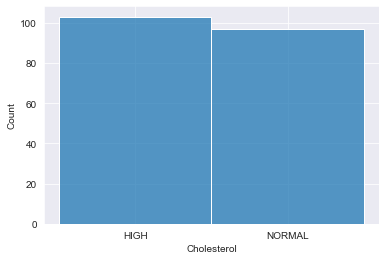

In [16]:
sns.histplot(df,x='Cholesterol') # roughly equivalent, slightly more high than normal

### Sodium/Potassium

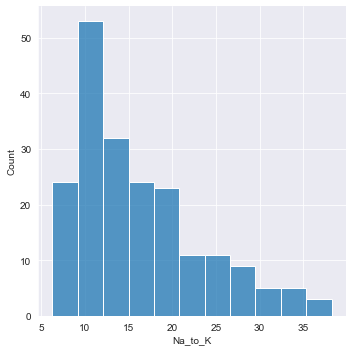

In [17]:
sns.displot(df,x='Na_to_K') # right skewed, most between 7-20, some higher outliers 

### Medication

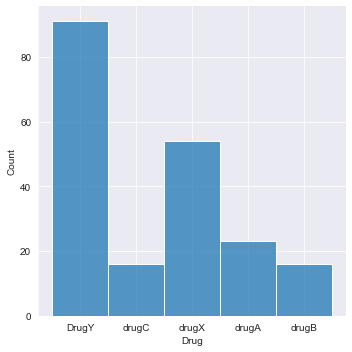

In [18]:
sns.displot(df,x='Drug') # Drug Y most common, followed by Drug X, A then C and B

### Sodium/Potassium balance with age

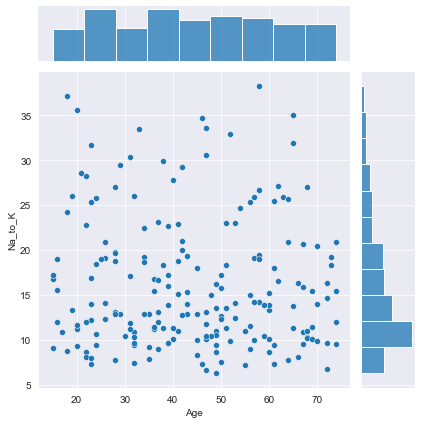

In [19]:
sns.jointplot(x='Age',y='Na_to_K',data=df) # no apparent correlation

### Cholesterol by Sex  

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

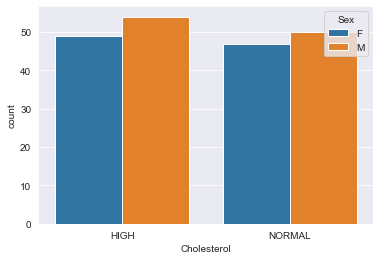

In [33]:
sns.countplot(x='Cholesterol', data=df, hue='Sex') # same rates for both sexes

### Blood Pressure by Cholesterol Level

<AxesSubplot:xlabel='BP', ylabel='count'>

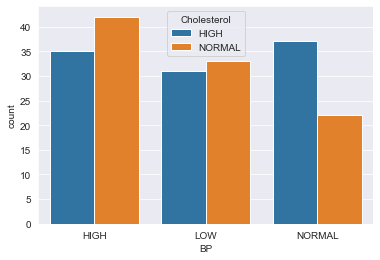

In [35]:
sns.countplot(x='BP', data=df, hue='Cholesterol') # odd, those with high cholesterol more likely to have normal bp

### Drug by Age

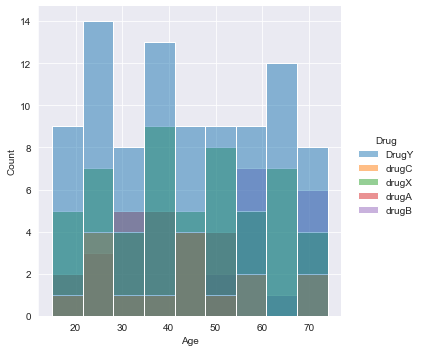

In [46]:
sns.displot(x='Age', data=df, hue='Drug') # No striking differences in drug prescription just based on age 

### Drug by Sex

<AxesSubplot:xlabel='Drug', ylabel='count'>

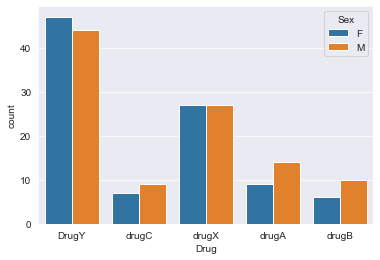

In [47]:
sns.countplot(x='Drug', data=df, hue='Sex') # no major differences in drug prescription by sex

### Drug by blood pressure

<AxesSubplot:xlabel='Drug', ylabel='count'>

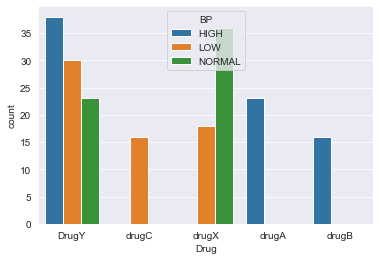

In [38]:
sns.countplot(x='Drug', data=df, hue='BP')  # drug C only for low bp, drug X for low/normal, drugs A and B for high, drug Y for all

### Drug by cholesterol level

<AxesSubplot:xlabel='Drug', ylabel='count'>

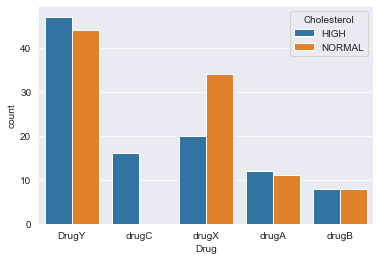

In [37]:
sns.countplot(x='Drug', data=df, hue='Cholesterol')  # drug C only for high cholesterol, drug X more for normal cholesterol

### Drug by Sodium/Potassium Level

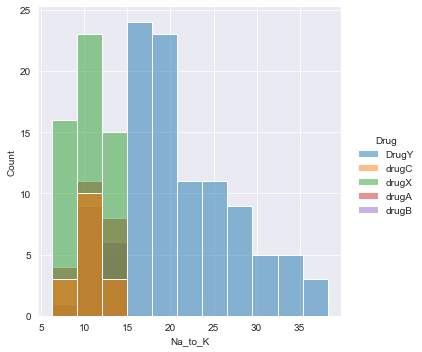

In [44]:
sns.displot(x='Na_to_K', data=df, hue='Drug') # drug Y for Na_to_K greater than 15 others for lower

## Data Preprocessing

### Convert categorical features to dummies

In [52]:
dummies = pd.get_dummies(df,columns=['Sex', 'BP', 'Cholesterol'],drop_first=True)
dummies.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0


### Split data into train and test

In [54]:
X = dummies.drop('Drug',axis=1)
y = dummies['Drug']

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modelling

### Decision Tree

#### Build and train model

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc = DecisionTreeClassifier()

In [58]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

#### Make predictions on test data

In [60]:
pred = dtc.predict(X_test)

#### Evaluate model performance

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

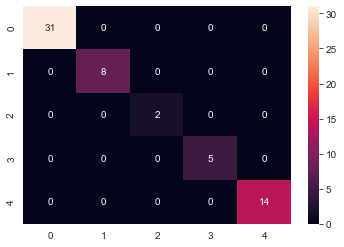

In [62]:
# no false labels
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [63]:
# 100% accuracy, precision, recall, f1
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        31
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Random Forest

#### Build and train model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(n_estimators=200)

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

#### Make predictions on test data

In [67]:
pred = rfc.predict(X_test)

#### Evaluate model performance

<AxesSubplot:>

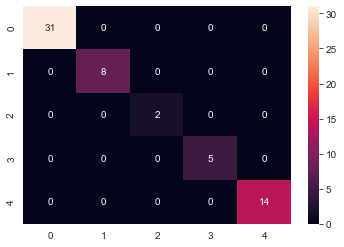

In [68]:
# no false labels
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [69]:
# 100% accuracy, precision, recall, f1
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        31
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

